## Supervised Learning - Regression

### Course Project for IBM Course

##### Bryan Kwok, 2020/11/10

## Introduction 

In this project, we will take the dataset provided by UCI Machine Learning Repository. We will first introduce and illustrate the content of the wine quality dataset.

Then we will show the statistics and some hypthesis we made in this dataset. After performing some simple pearson correlation tests, we will perform the linear regression model in different ways and compare the results. 

## Data Description

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

__Attribute Information:__

__Input variables__ (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

__Output variable__ (based on sensory data):

12. quality (score between 0 and 10)

## Main objectives of this analysis

- Discover the correlations of different variables
- Test and find the errors of different Linear Regression Models
- Perform cross validation using SciKit Learn with `cross_val_predict` and `GridSearchCV`


### Step 1: Getting and setting up the data.

In [185]:
### Install the libraries required in this project

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [186]:
filepath = "wine.csv"
df = pd.read_csv(filepath)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Step 2: Visualizing current data

We will do some quick visualization for the data we have. Let's go with the histogram of each attributes and see the distributions.

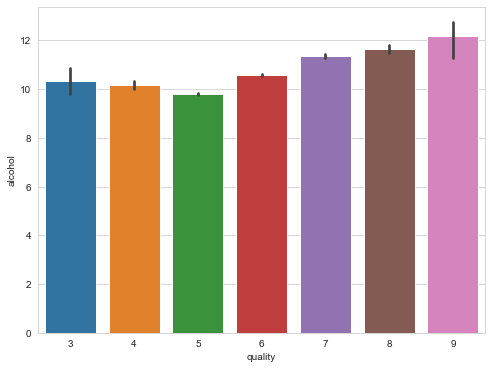

In [187]:
df_col_names = df.columns
#for i in range(len(df_col_names)):
#    fig = plt.figure(figsize = (10,6))
#    sns.barplot(x = df_col_names[i], y = 'alcohol', data = df)
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

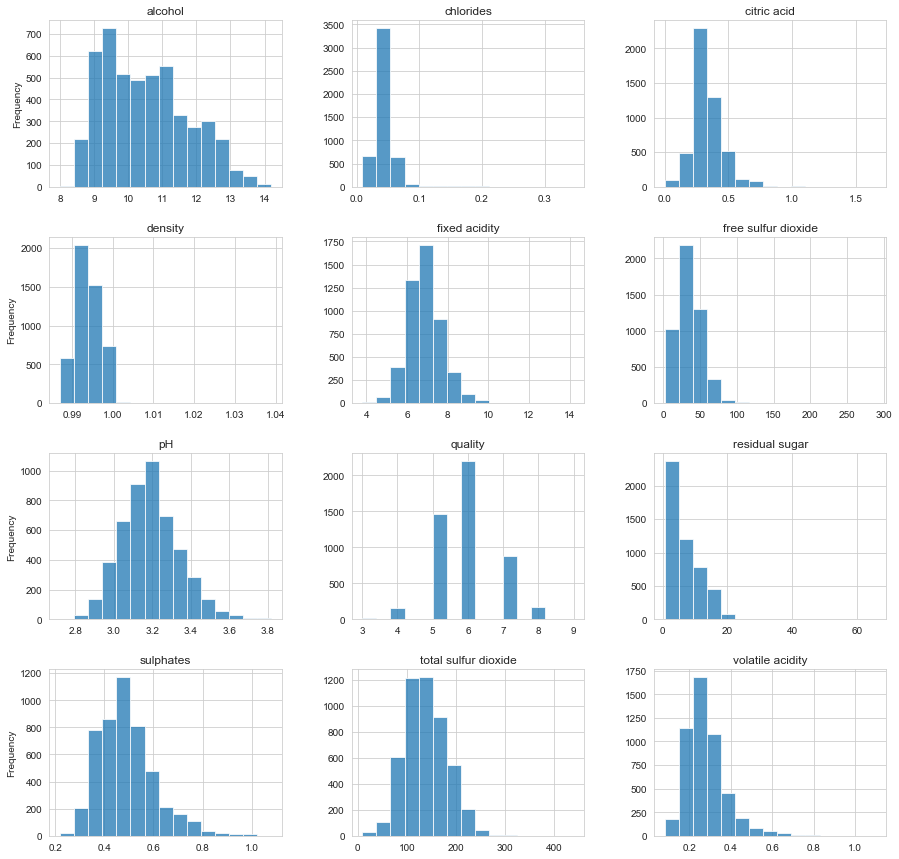

In [188]:
axList = df.hist(bins=15, alpha=0.75,figsize=(15,15))

# Add some y- labels to first column
for ax in axList.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
plt.show()

We can also do some corrleations and heatmap to check out the correlations of different variables in the dataset.

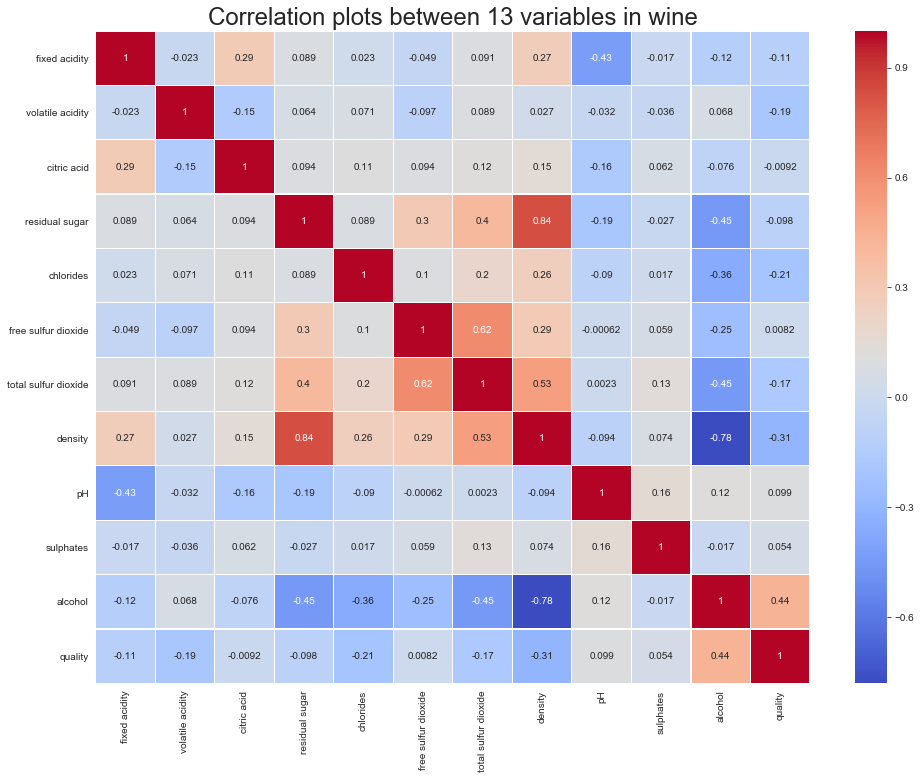

In [189]:
my_corr = df.corr()
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(my_corr,cmap ='coolwarm',annot=True,linewidths=.25,ax=ax)
ax.set_title("Correlation plots between 13 variables in wine",size="24")
plt.show()

From correlation plot, it is shown that density has relatively higher correlation to residual sugar and alcohol.

The correlation table of the variables is shown below:

In [190]:
my_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

The features with near 0 correlation to the wine quality will be dropped. The new dataframe will be saved as below:

In [191]:
df_copy = df.copy()

df.drop(['free sulfur dioxide', 'citric acid'], axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6


### Linear Regression Model

We will use scikit learn to do a multi variable regression. We will start with importing the linear regression library from the sklearn module.

In [192]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [193]:
# Create a LinearRegression Object
lreg = LinearRegression()

We start the multi variable regression analysis by seperating the dataframe into the data columns and the target columns:

In [194]:
# Data Columns
X_multi = df.drop('quality',1)

# Targets
Y_target = df.quality

Finally, we pass the X and Y using the linear regression object. And we can check the intercept and number of coefficients.



In [195]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 162.79 
 The number of coefficients used was 9 


The dataframe of all variables and estimated coeifficents obtained from the linear regression is computed as below:

In [197]:
# Set a DataFrame from the Features
coeff_df = DataFrame(df.columns)
coeff_df.columns = ['Variables']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df.sort_values(by="Coefficient Estimate",ascending=True)

,Variables,Coefficient Estimate
5,density,-162.938926
1,volatile acidity,-1.966499
3,chlorides,-0.153291
4,total sulfur dioxide,0.000715
0,fixed acidity,0.066463
2,residual sugar,0.087308
8,alcohol,0.183702
7,sulphates,0.637732
6,pH,0.707265
9,quality,NaN


After using the whole dataset as the linear regression model, we will try to build another model by using training and validation. A training set is implemented to build up a model, while a validation set is used to validate the model built.

A scikit learn has a built in function specifically for this called train_test_split.

In [198]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,df.quality)



The output of the train_test_split will be alike:


In [199]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3673, 9) (1225, 9) (3673,) (1225,)


After having the training and testing sets, these sets are used to predict the quality of wine.

In [200]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will run a prediction on both the X training set and the testing set.


In [201]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

The Mean square error by different sets are shown as below:

In [202]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.58
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.52


## Visualization of residual plots

We will try to visualize the residual plots in the training sets and testing sets respectively. The pattern is shown as below:

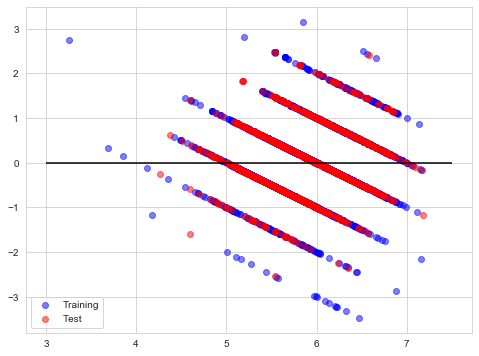

In [205]:
plt.figure(figsize=(8, 6))

# Scatter plot the training data

train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=3,xmax=7.5)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
#plt.title('Residual Plots of training and testing set for comparison')

It seems that there aren't any patterns in the residual plots. The residuals are randomly allocated. If we try to seperate the residual plots into two plots, the patterns are quite similar.

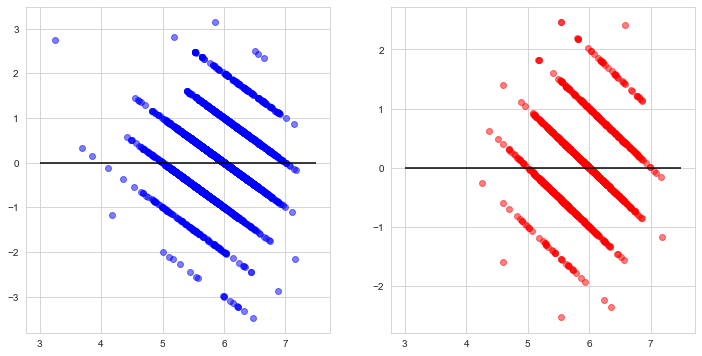

In [209]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)
plt.hlines(y=0,xmin=3,xmax=7.5)
#plt.title("Residual Error in Training set")
plt.subplot(1, 2, 2)
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=3,xmax=7.5)
#plt.title("Residual Error in Testing set")
fig.tight_layout()

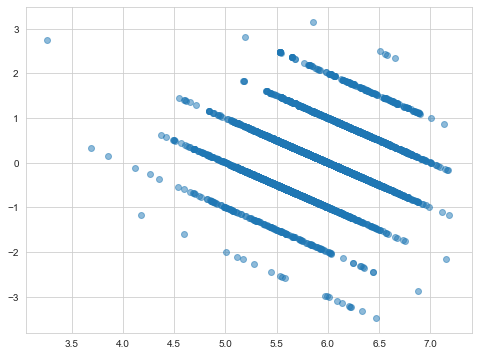

In [211]:
#Residual plot of all the dataset
plt.figure(figsize=(8, 6))
plt.scatter(pred_train,(Y_train-pred_train),c='tab:blue',alpha=0.5)
plt.scatter(pred_test,(Y_test-pred_test),c='tab:blue',alpha=0.5)
#plt.title("Residual plot of all the data in Wine")


### Cross Validation 

After we split the overall data into training and testing set, we can further use the `KFolds` object to split data into 3 folds.

In [212]:
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

In [213]:
X = df.drop('quality', axis=1)
y = df.quality
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)

In [214]:
scores

[0.22634532442087307,
 0.3161107169166346,
 0.3109874364562101,
 0.2535342838351633,
 0.24108771839904797]

### Pipeline and cross_val_predict

Pipeline lets you chain together multiple operators on your data that both have a fit method.

In [215]:
s = StandardScaler()
lr = LinearRegression()

In [216]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [217]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [218]:
r2_score(y, predictions)

0.27073210179874074

In [219]:
np.mean(scores) # almost identical!

0.2696130960055858

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 

## Hyperparameter tuning

Hyperparameter tuning involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that generalizes well outside of your sample.

In [220]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [221]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [222]:
list(zip(alphas,scores))

[(1e-09, 0.27073210261274205),
 (1e-08, 0.2707321099404624),
 (1e-07, 0.27073218323029014),
 (1e-06, 0.27073291576374203),
 (1e-05, 0.27074023032743155),
 (0.0001, 0.27081206665612645),
 (0.001, 0.2713553450509435),
 (0.01, 0.26891117812284704),
 (0.1, 0.2112766661254195),
 (1.0, -0.0006416984197650244)]

In [223]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 6.40027062e-02, -1.96879434e+00,  8.61741263e-02, -1.65903332e-01,
        7.08410608e-04, -1.59872748e+02,  6.96536339e-01,  6.33191116e-01,
        1.87183962e-01])

In [224]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.        , -0.        , -0.        , -0.        , -0.00308764,
       -0.        ,  0.        ,  0.        ,  0.        ])

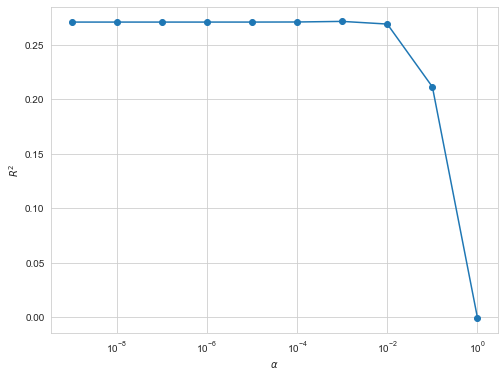

In [225]:
plt.figure(figsize=(8,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [226]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.001, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

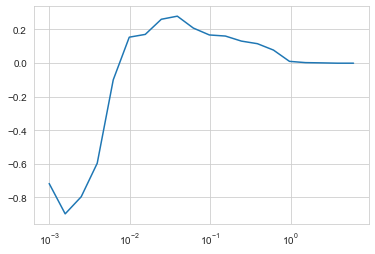

In [227]:
plt.semilogx(alphas, scores);

In [228]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.05))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.276378008809672

In [229]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.        , -0.        , -0.14304626,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.31973838,
       -0.02321749, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.04280917, -0.        , -0.        ,  0.        ,
        0.        , -0.00269342, -0.        , -0.        , -0.00157559,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.04968219,  0.        , -0.        , -0.        , -0.        ,
        0.00722708, -0.03603484, -0.        , -0.04160083,  0.        ,
        0.        ,  0.        ,  0.0055423 ,  0.        ,  0.00081463])

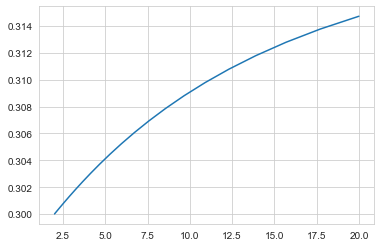

In [230]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(2, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [231]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [232]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [233]:
col_names_dict

{0: 'fixed acidity',
 1: 'volatile acidity',
 2: 'residual sugar',
 3: 'chlorides',
 4: 'total sulfur dioxide',
 5: 'density',
 6: 'pH',
 7: 'sulphates',
 8: 'alcohol'}

In [234]:
df_importances.sort_values(by=1)

,0,1
2,x1,-0.143046
40,x4^2,-0.049682
48,x5 x8,-0.041601
46,x5 x6,-0.036035
10,x0^2,-0.023217
31,x2 x6,-0.002693
34,x3^2,-0.001576
29,x2 x4,0.000000
30,x2 x5,0.000000
32,x2 x7,-0.000000


In [235]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [236]:
grid.fit(X, y)

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomial_features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge_regression',
                                        Ridge(alpha=1.0, copy_X=T...
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761

In [237]:
grid.best_score_, grid.best_params_

(0.31374693325210967,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 20.000000000000004})

In [238]:
y_predict = grid.predict(X)

In [239]:
r2_score(y, y_predict)

0.34849406270305383

In [240]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  1.22056344e-01, -2.12016163e-01,  4.57327263e-01,
       -9.49752234e-02,  5.65120330e-02, -5.43527067e-01,  1.22464537e-01,
        6.70337686e-02,  1.18110165e-01, -1.98793247e-02, -1.61388592e-03,
       -2.17634611e-02, -9.21194338e-03, -6.51749784e-03, -4.14524988e-02,
        6.83179537e-02,  2.81366377e-02, -2.24962097e-02,  1.44822943e-02,
        1.89465078e-04, -7.76331938e-03,  3.04645537e-02, -2.18436963e-02,
        2.81027507e-02, -1.47220873e-02,  5.49148546e-02, -1.81186763e-01,
       -7.85805019e-02, -8.10747279e-02,  1.40804313e-01,  2.16948494e-02,
        3.43374650e-02,  7.33974327e-02,  5.35990523e-03, -6.60779739e-03,
        5.13312410e-02, -3.93694380e-02, -3.58209160e-02, -2.81727920e-02,
       -7.79410111e-02,  1.81110187e-01, -1.46249064e-02, -1.45292873e-02,
        1.01503834e-01,  5.09095173e-02, -1.91624200e-01, -1.35102111e-01,
       -3.27810131e-02,  3.44365194e-02,  5.83425664e-02, -6.58034176e-02,
        4.04375950e-03, -

In [241]:
grid.cv_results_

{'mean_fit_time': array([0.00379443, 0.00357995, 0.00399003, 0.0037694 , 0.00338001,
        0.00357699, 0.00378275, 0.0038733 , 0.00378518, 0.00358367,
        0.00338006, 0.00378909, 0.00396862, 0.00357809, 0.00378771,
        0.0031909 , 0.00396528, 0.00376086, 0.00356979, 0.00338497,
        0.0038053 , 0.00398278, 0.00338416, 0.00358257, 0.00396304,
        0.00338459, 0.00378556, 0.00397978, 0.00378494, 0.00400143,
        0.00738182, 0.00777254, 0.00736413, 0.00757465, 0.00756445,
        0.0081665 , 0.00736146, 0.00795951, 0.00757437, 0.00777478,
        0.00758038, 0.00756907, 0.00776081, 0.00776157, 0.00755987,
        0.00794916, 0.00835762, 0.00756464, 0.00796046, 0.0079792 ,
        0.00916004, 0.00857368, 0.00878391, 0.00817766, 0.0089757 ,
        0.00816994, 0.00797853, 0.00817313, 0.00815701, 0.0079597 ,
        0.02332554, 0.0226984 , 0.02313957, 0.02253337, 0.02313347,
        0.02412915, 0.02393212, 0.02394314, 0.02513452, 0.02473569,
        0.02432609, 0.02333226,

`Ridge` or `Lasso`, performs best with its optimal hyperparameters on the wine dataset.

### Conclusion

Linear Regression  | scores
------------------ | -------------
Plain              | 0.2696
Lasso              | 0.3137
Ridge              | 0.3485

Both `Lasso` and `Ridge` with proper hyperparameter tuning give better results than plain Linear Regression!

Reference:

- https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb